In [25]:
import pandas as pd
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

import prepare


Bad key "text.kerning_factor" on line 4 in
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
if os.path.isfile('water_consumption.csv'):
    water = pd.read_csv('water_consumption.csv')
else:
    water = pd.read_excel('https://storage.googleapis.com/sa_saws_data_20/External%20Geekdom%20Data%20April%2021.xlsx')
    water.to_csv('water_consumption.csv', index_label='Record #')
water

,Record #,Record #.1,Prefix,Service Location,Suffix,ZIP Code,201701,201702,201703,201704,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,0,1,NaN,BUENA VISTA,ST,78207,3740.0,3740.0,3740.0,2992.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,W,TRAVIS,ST,78207,8229.0,7481.0,8229.0,8229.0,...,7481.0,6733.0,7481.0,9725.0,11222.0,9725.0,11222.0,10473.0,10473.0,10473.0
2,2,3,W,HOUSTON,ST,78207,4489.0,3740.0,3740.0,3740.0,...,4489.0,4489.0,4489.0,6733.0,4489.0,5237.0,5237.0,5985.0,4489.0,4489.0
3,3,4,W,HOUSTON,ST,78207,1496.0,2244.0,748.0,1496.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,NaN,BUENA VISTA,ST,78207,5237.0,4489.0,3740.0,4489.0,...,748.0,1496.0,748.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706862,706862,708592,NaN,ROBBINS GROVE,NaN,78245,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
706863,706863,708593,NaN,DULLES,NaN,78251,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4489.0
706864,706864,708594,NaN,HEIGHTS VALLEY,NaN,78109,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
706865,706865,708595,NaN,SPRING LIFE,NaN,78249,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.0


In [3]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706867 entries, 0 to 706866
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Record #          706867 non-null  int64  
 1   Record #.1        706867 non-null  int64  
 2   Prefix            44137 non-null   object 
 3   Service Location  706867 non-null  object 
 4   Suffix            321098 non-null  object 
 5   ZIP Code          706867 non-null  int64  
 6   201701            457074 non-null  float64
 7   201702            457570 non-null  float64
 8   201703            458684 non-null  float64
 9   201704            459359 non-null  float64
 10  201705            460668 non-null  float64
 11  201706            461155 non-null  float64
 12  201707            461680 non-null  float64
 13  201708            462188 non-null  float64
 14  201709            462340 non-null  float64
 15  201710            463001 non-null  float64
 16  201711            46

In [4]:
zip_code_group = water.groupby('ZIP Code').sum().drop(columns='Record #')
#zip_code_group.index = zip_code_group.index.astype('object')
zip_code_group

,Record #.1,201701,201702,201703,201704,201705,201706,201707,201708,201709,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
ZIP Code,,,,,,,,,,,,,,,,,,,,,
78006,632056814,5542666.0,5083328.0,5457367.0,7077015.0,9744003.0,10671635.0,14125612.0,15671203.0,13051348.0,...,5117703.0,8567981.0,9848728.0,8990652.0,9949704.0,17394082.0,21699393.0,15455756.0,11782579.0,8029336.0
78015,2199318064,14919234.0,14335711.0,14833189.0,18038836.0,21100117.0,25634356.0,29986050.0,34265186.0,27706583.0,...,15222114.0,19692109.0,22953859.0,21955124.0,22961337.0,33936022.0,45226348.0,32781721.0,27733477.0,21420965.0
78023,3195039638,49735702.0,45751880.0,49752792.0,57977511.0,72665809.0,82477222.0,92457594.0,112469266.0,75890837.0,...,44115673.0,57059513.0,62278315.0,65574516.0,59917267.0,93846728.0,128328981.0,88951969.0,69147387.0,55104745.0
78065,211231020,3938725.0,3266173.0,3308072.0,3525021.0,4182617.0,4312035.0,4633708.0,4574620.0,4248439.0,...,3040994.0,3469655.0,3661915.0,4199823.0,4295562.0,4784080.0,4503545.0,4353174.0,3477880.0,3400835.0
78069,249457364,3123272.0,2827019.0,2776893.0,2856195.0,3692586.0,3661165.0,3692587.0,3437485.0,3602830.0,...,2639253.0,2970667.0,3194366.0,3364928.0,3314810.0,3930498.0,3626009.0,3367172.0,2954958.0,2720790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78260,6041604328,70505674.0,65533114.0,69122279.0,84156082.0,109944951.0,109067700.0,151299106.0,147564817.0,117167449.0,...,59562474.0,86267540.0,90083150.0,96718684.0,99439068.0,149017639.0,194572130.0,129075293.0,92350004.0,74346381.0
78261,4940581250,43109693.0,40637166.0,42672794.0,52643575.0,62469979.0,67165838.0,85897499.0,80216467.0,71187657.0,...,38628370.0,54163694.0,56518772.0,62293361.0,59980904.0,97331434.0,107739853.0,88739509.0,58896893.0,51062742.0
78263,193088866,3040246.0,2820282.0,3011066.0,3079130.0,4191573.0,4790823.0,5574841.0,5242672.0,4380109.0,...,2673647.0,3062678.0,3110558.0,3860155.0,3828730.0,6168066.0,6373036.0,4916506.0,2973649.0,3115053.0


In [5]:
sso = pd.read_csv('SSO_with_zip_codes.csv')
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,...,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,...,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746
1,6583,2019-03-10 00:00:00,6804,S FLORES ST,80,0.0,2019-03-10 14:25:00,2019-03-10 15:45:00,1.333333,Grease,...,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","6804 S FLORES,SAN ANTONIO,Texas,USA","Flores, West Odessa, Ector County, Texas, Unit...",Texas
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,...,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,...,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3602 SE MILITARY DR,SAN ANTONIO,Texas,USA","Quality Suites, Southeast Military Drive, Hill...",78223
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,...,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","100 PANSY LN,SAN ANTONIO,Texas,USA","Pansy Lane, San Antonio, Bexar County, Texas, ...",78209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,371,2009-01-06 00:00:00,2383,LOOP 410 NE,2000,NaN,2009-01-06 12:00:00,2009-01-06 13:00:00,1.000000,Debris/Rock,...,structural,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","NE LOOP 410 02383,SAN ANTONIO,Texas,USA","Northeast Loop 410, San Antonio, Bexar County,...",78220-1930
3179,372,2009-01-05 00:00:00,7407,ELDERBERRY,800,NaN,2009-01-05 14:00:00,2009-01-05 16:00:00,2.000000,Rags,...,structural,0.00,0.0,0.0,0.0,NaN,"(250, 1000]","ELDERBERRY 07407,SAN ANTONIO,Texas,USA","Elderberry, Camp Willow, Guadalupe County, Tex...",Texas
3180,373,2009-01-05 00:00:00,7019,BAYWATER,400,NaN,2009-01-05 11:00:00,2009-01-05 11:45:00,0.750000,Rags,...,debris,0.00,0.0,0.0,0.0,NaN,"(250, 1000]","BAYWATER DR 07019,SAN ANTONIO,Texas,USA","Baywater Drive, San Antonio, Bexar County, Tex...",78229
3181,375,2009-01-05 00:00:00,12500,JOHN BARRY,25,NaN,2009-01-05 08:30:00,2009-01-05 09:00:00,0.500000,Debris/Rock,...,structural,0.00,0.0,0.0,0.0,NaN,"(15, 50]","JOHN BARRY 125/1,SAN ANTONIO,Texas,USA",NaN,None


In [6]:
#sso.merge(zip_code_group, left_on='zip_code', right_index=True)
sso.zip_code = sso.zip_code.str.strip()

In [7]:
sso = sso[sso.zip_code.str.isnumeric()]
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,...,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,...,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,...,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,...,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3602 SE MILITARY DR,SAN ANTONIO,Texas,USA","Quality Suites, Southeast Military Drive, Hill...",78223
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,...,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","100 PANSY LN,SAN ANTONIO,Texas,USA","Pansy Lane, San Antonio, Bexar County, Texas, ...",78209
5,6579,2019-03-05 00:00:00,3200,S HACKBERRY ST,250,0.0,2019-03-05 14:22:00,2019-03-05 14:32:00,0.166667,Grease,...,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3200 S Hackberry St,SAN ANTONIO,Texas,USA","3200, South Hackberry Street, Denver Heights, ...",78210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,222,2009-01-13 00:00:00,2802,LASSES,50,NaN,2009-01-13 13:00:00,2009-01-13 13:30:00,0.500000,Debris/Rock,...,structural,0.00,0.0,0.0,0.0,NaN,"(15, 50]","LASSES 02802,SAN ANTONIO,Texas,USA","Lasses Boulevard, San Antonio, Bexar County, T...",78223
3171,364,2009-01-08 00:00:00,3710,NEER AVE,3000,NaN,2009-01-08 08:30:00,2009-01-08 10:30:00,2.000000,Grease,...,structural,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","NEER AVE 03710,SAN ANTONIO,Texas,USA","Neer Avenue, Keystone Park, San Antonio, Bexar...",78201
3177,370,2009-01-06 00:00:00,101,LINDELL PLACE,1000,NaN,2009-01-06 18:00:00,2009-01-06 18:30:00,0.500000,Break In Main,...,structural,0.00,0.0,0.0,0.0,NaN,"(250, 1000]","LINDELL PLACE 00101,SAN ANTONIO,Texas,USA","Lindell Place, River Road, San Antonio, Bexar ...",78215
3180,373,2009-01-05 00:00:00,7019,BAYWATER,400,NaN,2009-01-05 11:00:00,2009-01-05 11:45:00,0.750000,Rags,...,debris,0.00,0.0,0.0,0.0,NaN,"(250, 1000]","BAYWATER DR 07019,SAN ANTONIO,Texas,USA","Baywater Drive, San Antonio, Bexar County, Tex...",78229


In [8]:
sso.zip_code = sso.zip_code.astype('int')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,...,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,...,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,...,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,...,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3602 SE MILITARY DR,SAN ANTONIO,Texas,USA","Quality Suites, Southeast Military Drive, Hill...",78223
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,...,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","100 PANSY LN,SAN ANTONIO,Texas,USA","Pansy Lane, San Antonio, Bexar County, Texas, ...",78209
5,6579,2019-03-05 00:00:00,3200,S HACKBERRY ST,250,0.0,2019-03-05 14:22:00,2019-03-05 14:32:00,0.166667,Grease,...,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3200 S Hackberry St,SAN ANTONIO,Texas,USA","3200, South Hackberry Street, Denver Heights, ...",78210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,222,2009-01-13 00:00:00,2802,LASSES,50,NaN,2009-01-13 13:00:00,2009-01-13 13:30:00,0.500000,Debris/Rock,...,structural,0.00,0.0,0.0,0.0,NaN,"(15, 50]","LASSES 02802,SAN ANTONIO,Texas,USA","Lasses Boulevard, San Antonio, Bexar County, T...",78223
3171,364,2009-01-08 00:00:00,3710,NEER AVE,3000,NaN,2009-01-08 08:30:00,2009-01-08 10:30:00,2.000000,Grease,...,structural,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","NEER AVE 03710,SAN ANTONIO,Texas,USA","Neer Avenue, Keystone Park, San Antonio, Bexar...",78201
3177,370,2009-01-06 00:00:00,101,LINDELL PLACE,1000,NaN,2009-01-06 18:00:00,2009-01-06 18:30:00,0.500000,Break In Main,...,structural,0.00,0.0,0.0,0.0,NaN,"(250, 1000]","LINDELL PLACE 00101,SAN ANTONIO,Texas,USA","Lindell Place, River Road, San Antonio, Bexar ...",78215
3180,373,2009-01-05 00:00:00,7019,BAYWATER,400,NaN,2009-01-05 11:00:00,2009-01-05 11:45:00,0.750000,Rags,...,debris,0.00,0.0,0.0,0.0,NaN,"(250, 1000]","BAYWATER DR 07019,SAN ANTONIO,Texas,USA","Baywater Drive, San Antonio, Bexar County, Tex...",78229


In [10]:
sso = sso.merge(zip_code_group, left_on='zip_code', right_on='ZIP Code')
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
1,6452,2018-09-16 00:00:00,12251,FARVIEW LN,138900,0.0,2018-09-16 16:40:00,2018-09-17 03:00:00,10.333333,I/I,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
2,6426,2018-09-04 00:00:00,12251,FARVIEW LN,81600,NaN,2018-09-04 08:09:00,2018-09-04 21:45:00,13.600000,I/I,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
3,6391,2018-07-09 00:00:00,103,MORGANS CIR,2750,0.0,2018-07-09 16:50:00,2018-07-09 17:45:00,0.916667,I/I,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
4,6361,2018-05-07 00:00:00,6931,SAN PEDRO AVE,225,0.0,2018-05-07 09:55:00,2018-05-07 10:40:00,0.750000,Debris,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,2477,2011-09-23 00:00:00,7951,MELBURY FOREST,10000,135000.0,2011-09-23 18:30:00,2011-09-23 21:30:00,3.000000,Grease,...,32509317.0,36759476.0,36978696.0,40246435.0,42870904.0,49569452.0,52827457.0,42961360.0,36131751.0,36383860.0
1587,33,2010-12-07 00:00:00,5806,ROYAL HAVEN,10,0.0,2010-12-07 08:00:00,2010-12-07 08:30:00,0.500000,Grease,...,32509317.0,36759476.0,36978696.0,40246435.0,42870904.0,49569452.0,52827457.0,42961360.0,36131751.0,36383860.0
1588,1671,2010-09-16 00:00:00,6345,WALZEM RD,300,0.0,2010-09-16 15:00:00,2010-09-16 15:30:00,0.500000,Grease,...,32509317.0,36759476.0,36978696.0,40246435.0,42870904.0,49569452.0,52827457.0,42961360.0,36131751.0,36383860.0
1589,1934,2010-03-25 00:00:00,6100,WALZEM RD,1000,0.0,2010-03-25 09:30:00,2010-03-25 10:30:00,1.000000,Rags,...,32509317.0,36759476.0,36978696.0,40246435.0,42870904.0,49569452.0,52827457.0,42961360.0,36131751.0,36383860.0


In [11]:
sso.report_date = pd.to_datetime(sso.report_date)
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,6581,2019-03-09,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
1,6452,2018-09-16,12251,FARVIEW LN,138900,0.0,2018-09-16 16:40:00,2018-09-17 03:00:00,10.333333,I/I,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
2,6426,2018-09-04,12251,FARVIEW LN,81600,NaN,2018-09-04 08:09:00,2018-09-04 21:45:00,13.600000,I/I,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
3,6391,2018-07-09,103,MORGANS CIR,2750,0.0,2018-07-09 16:50:00,2018-07-09 17:45:00,0.916667,I/I,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
4,6361,2018-05-07,6931,SAN PEDRO AVE,225,0.0,2018-05-07 09:55:00,2018-05-07 10:40:00,0.750000,Debris,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,2477,2011-09-23,7951,MELBURY FOREST,10000,135000.0,2011-09-23 18:30:00,2011-09-23 21:30:00,3.000000,Grease,...,32509317.0,36759476.0,36978696.0,40246435.0,42870904.0,49569452.0,52827457.0,42961360.0,36131751.0,36383860.0
1587,33,2010-12-07,5806,ROYAL HAVEN,10,0.0,2010-12-07 08:00:00,2010-12-07 08:30:00,0.500000,Grease,...,32509317.0,36759476.0,36978696.0,40246435.0,42870904.0,49569452.0,52827457.0,42961360.0,36131751.0,36383860.0
1588,1671,2010-09-16,6345,WALZEM RD,300,0.0,2010-09-16 15:00:00,2010-09-16 15:30:00,0.500000,Grease,...,32509317.0,36759476.0,36978696.0,40246435.0,42870904.0,49569452.0,52827457.0,42961360.0,36131751.0,36383860.0
1589,1934,2010-03-25,6100,WALZEM RD,1000,0.0,2010-03-25 09:30:00,2010-03-25 10:30:00,1.000000,Rags,...,32509317.0,36759476.0,36978696.0,40246435.0,42870904.0,49569452.0,52827457.0,42961360.0,36131751.0,36383860.0


In [12]:
sso_month = sso.report_date.dt.month.map("{:02}".format)
sso_year = sso.report_date.dt.year

In [13]:
sso = sso[sso.report_date > '2017-01-31']
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,6581,2019-03-09,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
1,6452,2018-09-16,12251,FARVIEW LN,138900,0.0,2018-09-16 16:40:00,2018-09-17 03:00:00,10.333333,I/I,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
2,6426,2018-09-04,12251,FARVIEW LN,81600,NaN,2018-09-04 08:09:00,2018-09-04 21:45:00,13.600000,I/I,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
3,6391,2018-07-09,103,MORGANS CIR,2750,0.0,2018-07-09 16:50:00,2018-07-09 17:45:00,0.916667,I/I,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
4,6361,2018-05-07,6931,SAN PEDRO AVE,225,0.0,2018-05-07 09:55:00,2018-05-07 10:40:00,0.750000,Debris,...,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,6264,2017-12-01,5435,LOOP 1604 N W,110,0.0,2017-12-01 12:06:00,2017-12-01 13:56:00,1.833333,Debris,...,16464042.0,23755855.0,27553201.0,24242839.0,26206596.0,42368600.0,52586903.0,40522272.0,35611019.0,24824126.0
1556,6239,2017-10-03,29010,FAIRS GATE,102,0.0,2017-10-03 08:59:00,2017-10-03 10:05:00,1.100000,Contractor,...,15222114.0,19692109.0,22953859.0,21955124.0,22961337.0,33936022.0,45226348.0,32781721.0,27733477.0,21420965.0
1558,6237,2017-10-02,809,DAVY CROCKETT RD,100,0.0,2017-10-02 08:50:00,2017-10-02 09:05:00,0.250000,Contractor,...,6292132.0,6506115.0,6901869.0,7726297.0,7993359.0,8911305.0,8728756.0,7874411.0,6783634.0,6628033.0
1559,6224,2017-09-19,809,DAVY CROCKETT DR,150,0.0,2017-09-19 08:25:00,2017-09-19 08:46:00,0.350000,Structural - Broken Force Main,...,6292132.0,6506115.0,6901869.0,7726297.0,7993359.0,8911305.0,8728756.0,7874411.0,6783634.0,6628033.0


In [14]:
sso['consumption_code'] = sso_year.astype(str) + sso_month.astype(str)
sso

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,...,201904,201905,201906,201907,201908,201909,201910,201911,201912,consumption_code
0,6581,2019-03-09,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,...,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0,201903
1,6452,2018-09-16,12251,FARVIEW LN,138900,0.0,2018-09-16 16:40:00,2018-09-17 03:00:00,10.333333,I/I,...,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0,201809
2,6426,2018-09-04,12251,FARVIEW LN,81600,NaN,2018-09-04 08:09:00,2018-09-04 21:45:00,13.600000,I/I,...,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0,201809
3,6391,2018-07-09,103,MORGANS CIR,2750,0.0,2018-07-09 16:50:00,2018-07-09 17:45:00,0.916667,I/I,...,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0,201807
4,6361,2018-05-07,6931,SAN PEDRO AVE,225,0.0,2018-05-07 09:55:00,2018-05-07 10:40:00,0.750000,Debris,...,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0,201805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,6264,2017-12-01,5435,LOOP 1604 N W,110,0.0,2017-12-01 12:06:00,2017-12-01 13:56:00,1.833333,Debris,...,23755855.0,27553201.0,24242839.0,26206596.0,42368600.0,52586903.0,40522272.0,35611019.0,24824126.0,201712
1556,6239,2017-10-03,29010,FAIRS GATE,102,0.0,2017-10-03 08:59:00,2017-10-03 10:05:00,1.100000,Contractor,...,19692109.0,22953859.0,21955124.0,22961337.0,33936022.0,45226348.0,32781721.0,27733477.0,21420965.0,201710
1558,6237,2017-10-02,809,DAVY CROCKETT RD,100,0.0,2017-10-02 08:50:00,2017-10-02 09:05:00,0.250000,Contractor,...,6506115.0,6901869.0,7726297.0,7993359.0,8911305.0,8728756.0,7874411.0,6783634.0,6628033.0,201710
1559,6224,2017-09-19,809,DAVY CROCKETT DR,150,0.0,2017-09-19 08:25:00,2017-09-19 08:46:00,0.350000,Structural - Broken Force Main,...,6506115.0,6901869.0,7726297.0,7993359.0,8911305.0,8728756.0,7874411.0,6783634.0,6628033.0,201709


In [15]:
this_month_consumption = []

for index, row in sso.iterrows():
    zip_code = row.zip_code
    consumption_code = row.consumption_code
    
    this_month_consumption.append(zip_code_group.loc[zip_code, consumption_code])
    
sso['curr_month_consumption'] = this_month_consumption

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
last_month_consumption = []

for index, row in sso.iterrows():
    zip_code = row.zip_code
    consumption_code = row.consumption_code
    
    month = row.consumption_code[-2:]
    year = row.consumption_code[:4]
    
    if month == '01':
        int_year = int(year)
        prev_year = int_year - 1
        consumption_code = str(prev_year) + '12'
    else:
        int_month = int(month)
        prev_month = int_month - 1
        if prev_month < 10:
            prev_month = '0' + str(prev_month)
            
        consumption_code = year + str(prev_month)
    
    last_month_consumption.append(zip_code_group.loc[zip_code, consumption_code])
    
sso['prev_month_consumption'] = last_month_consumption

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
df = sso[['root_cause', 'prev_month_consumption', 'curr_month_consumption']].dropna()

In [24]:
df

,root_cause,prev_month_consumption,curr_month_consumption
1,rain event,62155628.0,77189539.0
2,rain event,62155628.0,77189539.0
3,rain event,72397148.0,75373164.0
4,contractor,42997272.0,51640964.0
5,structural,57117878.0,50194817.0
...,...,...,...
1554,debris,30343609.0,31209186.0
1556,structural,27706583.0,27821054.0
1558,lift station,7780146.0,6923559.0
1559,lift station,8336747.0,7780146.0


In [28]:
df['diff_month_consumption'] = df.curr_month_consumption - df.prev_month_consumption
df

,root_cause,prev_month_consumption,curr_month_consumption,diff_month_consumption
1,rain event,62155628.0,77189539.0,15033911.0
2,rain event,62155628.0,77189539.0,15033911.0
3,rain event,72397148.0,75373164.0,2976016.0
4,contractor,42997272.0,51640964.0,8643692.0
5,structural,57117878.0,50194817.0,-6923061.0
...,...,...,...,...
1554,debris,30343609.0,31209186.0,865577.0
1556,structural,27706583.0,27821054.0,114471.0
1558,lift station,7780146.0,6923559.0,-856587.0
1559,lift station,8336747.0,7780146.0,-556601.0


In [30]:
mean_water = df.groupby('root_cause').mean()
mean_water

,prev_month_consumption,curr_month_consumption,diff_month_consumption
root_cause,,,
contractor,7.123722e+07,7.456135e+07,3.324128e+06
debris,6.339690e+07,6.212892e+07,-1.267982e+06
grease,6.257799e+07,6.114491e+07,-1.433076e+06
lift station,3.757723e+07,3.442873e+07,-3.148506e+06
other,6.612953e+07,6.445000e+07,-1.679530e+06
rain event,6.182926e+07,6.030964e+07,-1.519624e+06
roots,6.247816e+07,6.290374e+07,4.255800e+05
structural,5.420354e+07,5.332666e+07,-8.768780e+05
vandalism,6.485999e+07,6.202026e+07,-2.839732e+06


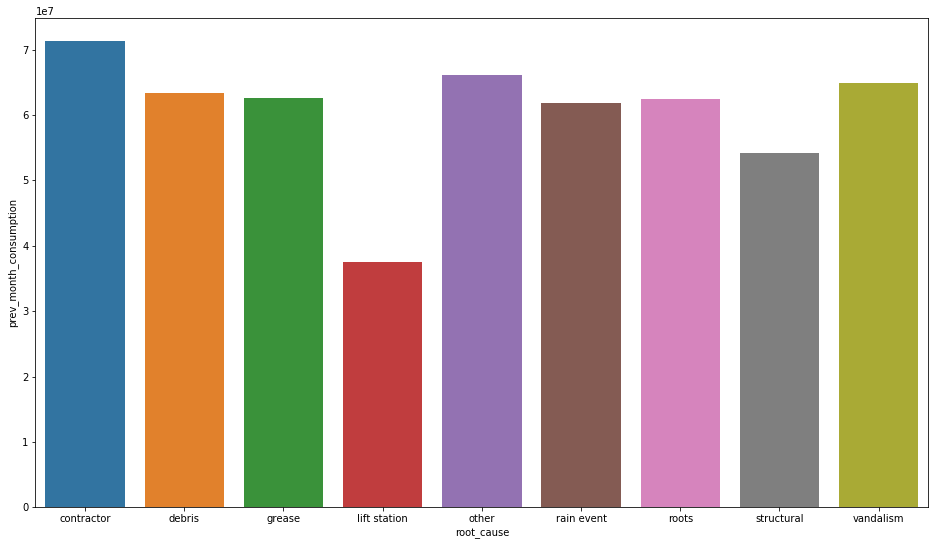

In [33]:
plt.figure(figsize=(16,9))
sns.barplot(x=mean_water.index, y=mean_water.prev_month_consumption)

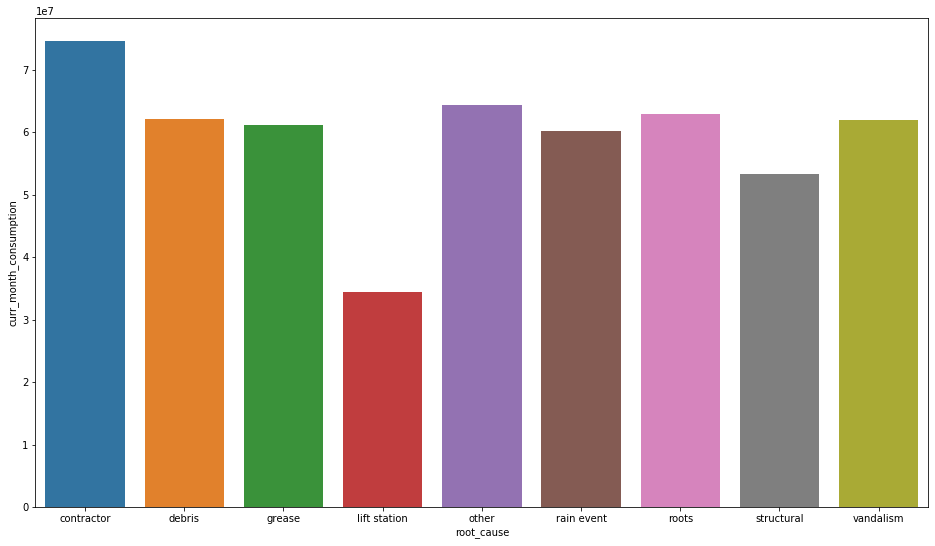

In [35]:
plt.figure(figsize=(16,9))
sns.barplot(x=mean_water.index, y=mean_water.curr_month_consumption)

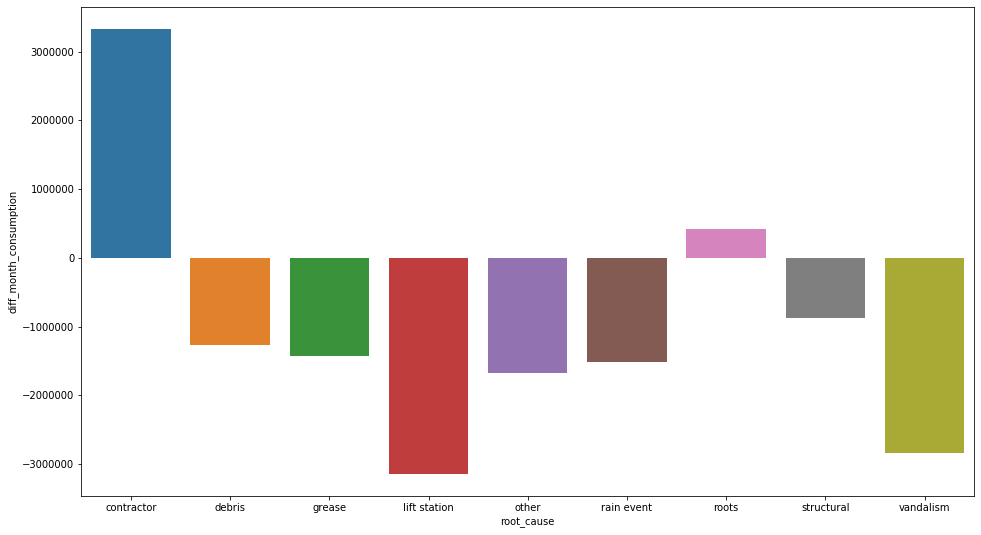

In [36]:
plt.figure(figsize=(16,9))
sns.barplot(x=mean_water.index, y=mean_water.diff_month_consumption)